In [13]:
import numpy as np
import pandas as pd

# Load the .npy file
npy_file = r"C:\Users\akhileshsing2024\AlphaPose\results\X3D.npy"
data = np.load(npy_file)  # shape: (frames, 17, 3)

# Joint names for H36M
h36m_joints = [
    "Hip", "RHip", "RKnee", "RFoot", "LHip", "LKnee", "LFoot",
    "Spine", "Thorax", "Neck", "Head", "LShoulder", "LElbow",
    "LWrist", "RShoulder", "RElbow", "RWrist"
]

# Create headers: jointname_X, jointname_Y, jointname_Z
columns = []
for joint in h36m_joints:
    columns.extend([f"{joint}_X", f"{joint}_Y", f"{joint}_Z"])

# Flatten each frame from shape (17, 3) → (51,)
data_flat = data.reshape(data.shape[0], -1)

# Create DataFrame
df = pd.DataFrame(data_flat, columns=columns)

# Save to Excel
excel_path = r"C:\Users\akhileshsing2024\AlphaPose\results\X3D_H36M.xlsx"
df.to_excel(excel_path, index=False)

print(f"Excel file saved to: {excel_path}")


Excel file saved to: C:\Users\akhileshsing2024\AlphaPose\results\X3D_H36M.xlsx


Hip_Y


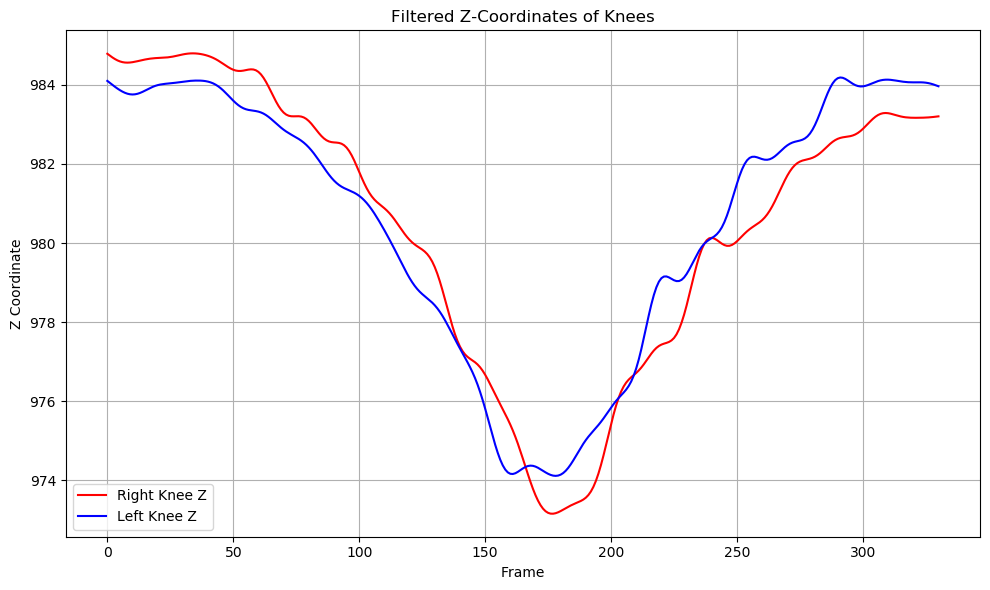

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the Excel file
file_path = r"C:\Users\akhileshsing2024\AlphaPose\results\X3D_H36M.xlsx"
df = pd.read_excel(file_path)

# Clean column names: remove all spaces
df.columns = df.columns.str.replace(' ', '', regex=False)
print(df.columns[1])
# Define Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff=2, fs=30.0, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Now safely access the cleaned column names
z_columns = ['RKnee_Y', 'LKnee_Y']
filtered_z_data = df[z_columns].interpolate(limit_direction='both').copy()

# Apply filter
for col in z_columns:
    filtered_z_data[col] = butter_lowpass_filter(filtered_z_data[col])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_z_data.index, filtered_z_data['RKnee_Y'], label='Right Knee Z', color='red')
plt.plot(filtered_z_data.index, filtered_z_data['LKnee_Y'], label='Left Knee Z', color='blue')
plt.title("Filtered Z-Coordinates of Knees")
plt.xlabel("Frame")
plt.ylabel("Z Coordinate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import os

# Input and output file paths
input_file = r"C:\Users\akhileshsing2024\AlphaPose\results\3d_output_keypoints.xlsx" # Replace with your Excel file path
output_file = r'C:\Users\akhileshsing2024\AlphaPose\results\heights_output.xlsx'

try:
    # Read the Excel file
    df = pd.read_excel(input_file)

    # Verify required columns exist
    required_columns = ['Joint10_z', 'Joint3_z', 'Joint6_z']
    if not all(col in df.columns for col in required_columns):
        missing = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # Calculate height for each frame
    # Height = |Joint10_z - (Joint3_z + Joint6_z)/2|
    df['Height'] = abs(df['Joint10_z'] - (df['Joint3_z'] + df['Joint6_z']) / 2)

    # Create output DataFrame with frame index and height
    output_df = df[['Height']].copy()
    output_df.index.name = 'Frame'

    # Save to a separate Excel file
    output_df.to_excel(output_file)

    # Confirm successful save
    print(f"Heights successfully saved to '{output_file}'")
    print("First 5 frames' heights:")
    print(output_df.head())

except FileNotFoundError:
    print(f"Error: Input file '{input_file}' not found. Please check the file path.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Heights successfully saved to 'C:\Users\akhileshsing2024\AlphaPose\results\heights_output.xlsx'
First 5 frames' heights:
         Height
Frame          
0      0.234614
1      0.234791
2      0.234940
3      0.235115
4      0.235272
